# Library

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.externals import joblib
import matplotlib.pyplot as plt

# Loading Data

In [2]:
# Read the dataset into a data table using Pandas
df = pd.read_csv("WGC_77000.csv")

# Preprocessing Data

In [3]:
#Converting data table to Dataframe
#df=pd.DataFrame(dt)
#display head of dataframe
#df.head()
#df.iloc[:, 0]
df.set_index('DATE')
df.head(0)
df.iloc[0,:]

DATE               9/1/19 0:00
FCCFFI232.PV           2337.91
FCCFPC175.MV              82.5
FCCFPC175.PV              1.55
FCCGAI008.PV               1.2
FCCGDI501AM.PV       0.0983451
FCCGDI501M.PV         0.134822
FCCGDI502AM.PV    -0.000606519
FCCGDI502M.PV        0.0506126
FCCGFC014.MV               100
FCCGFC014.PV            622.07
FCCGFC028.MV               100
FCCGFC028.PV             380.3
FCCGFC030.PV           150.611
FCCGFI004.PV             150.8
FCCGHI020.PV              64.5
FCCGKP501M.PV            10680
FCCGLC040.PV           39.7191
FCCGLC501.MV              21.8
FCCGLC501.PV              59.9
FCCGLI015.PV              -1.2
FCCGLI510.PV              59.8
FCCGPC039.PV             5.487
FCCGPDI510.PV             6792
FCCGPI009.PV             7.422
FCCGPI022.PV                 6
FCCGPI023.PV               5.4
FCCGPI025.PV              13.3
FCCGPI501.PV              10.6
FCCGPI503.PV               2.3
                      ...     
FCCGTI508M.PV          58.9778
FCCGTI50

In [4]:
df.index
#df.dtypes

RangeIndex(start=0, stop=77904, step=1)

In [5]:
# Remove the fields from the data set that we don't want to include in our model
del df['FCCAGPI604_P.PV']
del df['FCCGFI600.PV']
del df['FCCGTI505M.PV']
del df['FCCGTI504M.PV']
del df['FCCGPI509.PV']
# df.drop('FCCGPI509.PV', axis=1, inplace=True)

In [6]:
df.head(0)
#df.describe

,DATE,FCCFFI232.PV,FCCFPC175.MV,FCCFPC175.PV,FCCGAI008.PV,FCCGDI501AM.PV,FCCGDI501M.PV,FCCGDI502AM.PV,FCCGDI502M.PV,FCCGFC014.MV,...,FCCGYI503M.PV,FCCGYI504.PV,FCCGYI504M.PV,FCCGYI505.PV,FCCGYI505M.PV,FCCGYI506.PV,FCCGYI506M.PV,FCCGYI507M.PV,FCCGYI508.PV,FCCGYI508M.PV


###### Identify Zeros and conver to np.NaN

In [9]:
df=df.dropna(how='all')
df=df.replace(to_replace=0,value=np.nan) #repalces Zero with value np.nan

## Defining function to count np.NaN

In [10]:
import numpy as np

bool = df.isna() # or use df.isnull()
bool.shape
#bool.head()
bool

,DATE,FCCFFI232.PV,FCCFPC175.MV,FCCFPC175.PV,FCCGAI008.PV,FCCGDI501AM.PV,FCCGDI501M.PV,FCCGDI502AM.PV,FCCGDI502M.PV,FCCGFC014.MV,...,FCCGYI503M.PV,FCCGYI504.PV,FCCGYI504M.PV,FCCGYI505.PV,FCCGYI505M.PV,FCCGYI506.PV,FCCGYI506M.PV,FCCGYI507M.PV,FCCGYI508.PV,FCCGYI508M.PV
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Column wise how may np.NaN are there

In [11]:
count=0
# for i in range(77905):
for j in range(71):
    loop=0
    for i in range(77904):
        if(bool.iloc[i,j]==True):
            count+=1
            loop+=1
    print(j,"th Column has", loop, "np.Nans","total count of",count)
count

0 th Column has 0 np.Nans total count of 0
1 th Column has 11 np.Nans total count of 11
2 th Column has 37 np.Nans total count of 48
3 th Column has 37 np.Nans total count of 85
4 th Column has 38 np.Nans total count of 123
5 th Column has 34 np.Nans total count of 157
6 th Column has 34 np.Nans total count of 191
7 th Column has 34 np.Nans total count of 225
8 th Column has 34 np.Nans total count of 259
9 th Column has 1619 np.Nans total count of 1878
10 th Column has 1470 np.Nans total count of 3348
11 th Column has 1607 np.Nans total count of 4955
12 th Column has 38 np.Nans total count of 4993
13 th Column has 1624 np.Nans total count of 6617
14 th Column has 1361 np.Nans total count of 7978
15 th Column has 37 np.Nans total count of 8015
16 th Column has 34 np.Nans total count of 8049
17 th Column has 36 np.Nans total count of 8085
18 th Column has 1222 np.Nans total count of 9307
19 th Column has 34 np.Nans total count of 9341
20 th Column has 3771 np.Nans total count of 13112
21

187411

### Remove Columns with no value

In [12]:
df.columns

Index(['DATE', 'FCCFFI232.PV', 'FCCFPC175.MV', 'FCCFPC175.PV', 'FCCGAI008.PV',
       'FCCGDI501AM.PV', 'FCCGDI501M.PV', 'FCCGDI502AM.PV', 'FCCGDI502M.PV',
       'FCCGFC014.MV', 'FCCGFC014.PV', 'FCCGFC028.MV', 'FCCGFC028.PV',
       'FCCGFC030.PV', 'FCCGFI004.PV', 'FCCGHI020.PV', 'FCCGKP501M.PV',
       'FCCGLC040.PV', 'FCCGLC501.MV', 'FCCGLC501.PV', 'FCCGLI015.PV',
       'FCCGLI510.PV', 'FCCGPC039.PV', 'FCCGPDI510.PV', 'FCCGPI009.PV',
       'FCCGPI022.PV', 'FCCGPI023.PV', 'FCCGPI025.PV', 'FCCGPI501.PV',
       'FCCGPI503.PV', 'FCCGPI504.PV', 'FCCGPI505.PV', 'FCCGPI508.PV',
       'FCCGPI511.PV', 'FCCGPI512.PV', 'FCCGTI012.PV', 'FCCGTI037.PV',
       'FCCGTI501M.PV', 'FCCGTI502M.PV', 'FCCGTI503M.PV', 'FCCGTI505AM.PV',
       'FCCGTI506M.PV', 'FCCGTI507M.PV', 'FCCGTI508M.PV', 'FCCGTI509M.PV',
       'FCCGTI510M.PV', 'FCCGTI511M.PV', 'FCCGTI512M.PV', 'FCCGTI513M.PV',
       'FCCGTI514M.PV', 'FCCGTI518M.PV', 'FCCGTI521M.PV', 'FCCGTI522M.PV',
       'FCCGTI523M.PV', 'FCCGTI528.PV', 'FCC

In [13]:
# Remove the fields from the data set that we don't want to include in our model
#del df['FCCAGPI604_P.PV']       #N2 INJECTION PRESSURE
#del df['FCCGFI600.PV']          #N2 INJECTION FLOW
#del df['FCCGTI504M.PV']         #TUR TH BEARING ACT TEMP
#del df['FCCGTI505M.PV']         #TUR TH BEARING NA TEMP
#del df['FCCGPI509.PV']          #GLAND STEAM PRESSURE
del df['FCCGTI502M.PV']          #TUR TH BEARING ACT TEMP
del df['FCCGTI505AM.PV']         #TUR TH BEARING NA TEMP
del df['FCCGTI511M.PV']          #COMP TH BEARING NA TEMP
#del df['FCCGTI518M.PV']         #FIRST STAGE DISCHARGE TEMP
# also drop column by df.drop('FCCAGPI604_P.PV',axis=1, inplace=True)

In [14]:
df.head(0)

,DATE,FCCFFI232.PV,FCCFPC175.MV,FCCFPC175.PV,FCCGAI008.PV,FCCGDI501AM.PV,FCCGDI501M.PV,FCCGDI502AM.PV,FCCGDI502M.PV,FCCGFC014.MV,...,FCCGYI503M.PV,FCCGYI504.PV,FCCGYI504M.PV,FCCGYI505.PV,FCCGYI505M.PV,FCCGYI506.PV,FCCGYI506M.PV,FCCGYI507M.PV,FCCGYI508.PV,FCCGYI508M.PV


In [15]:
df.describe()

,FCCFFI232.PV,FCCFPC175.MV,FCCFPC175.PV,FCCGAI008.PV,FCCGDI501AM.PV,FCCGDI501M.PV,FCCGDI502AM.PV,FCCGDI502M.PV,FCCGFC014.MV,FCCGFC014.PV,...,FCCGYI503M.PV,FCCGYI504.PV,FCCGYI504M.PV,FCCGYI505.PV,FCCGYI505M.PV,FCCGYI506.PV,FCCGYI506M.PV,FCCGYI507M.PV,FCCGYI508.PV,FCCGYI508M.PV
count,77893.000000,77867.000000,77867.000000,77866.000000,77870.000000,77870.000000,77870.000000,77870.000000,76285.000000,76434.000000,...,77870.000000,77867.000000,77870.000000,77867.000000,7.787000e+04,77867.000000,7.787000e+04,7.787000e+04,77869.000000,7.786900e+04
mean,2217.032046,83.784931,1.493692,0.587789,0.155100,0.194590,-0.000606,0.103055,99.275714,647.448107,...,31.272095,36.814535,36.701659,22.475906,2.234659e+01,23.479241,2.333363e+01,1.365695e+01,14.643794,1.453485e+01
std,637.644631,7.282665,0.060933,0.237509,0.025275,0.047817,0.000008,0.109310,5.644766,76.442696,...,4.209178,5.225070,5.222652,3.161184,3.157492e+00,3.492478,3.485343e+00,2.150714e+00,2.791753,2.787920e+00
min,10.985000,7.900000,0.130000,0.100000,0.010701,0.012710,-0.000607,-0.116991,0.041999,0.800000,...,0.911756,0.900000,0.794016,0.100000,4.310000e-25,0.080000,1.940000e-30,2.180000e-33,0.070253,3.860000e-24
25%,2006.190000,79.800000,1.450000,0.400000,0.132383,0.151223,-0.000607,0.074373,99.951000,591.752500,...,31.488600,36.300000,36.176300,22.100000,2.201980e+01,22.860000,2.272400e+01,1.303820e+01,13.162500,1.304890e+01
50%,2557.635000,84.400000,1.470000,0.500000,0.153116,0.183165,-0.000607,0.099726,100.000000,649.125000,...,31.799100,36.800000,36.693450,22.700000,2.253560e+01,23.610000,2.346450e+01,1.385680e+01,14.893400,1.478560e+01
75%,2662.633000,88.700000,1.550000,0.700000,0.179749,0.243177,-0.000607,0.116918,100.000000,702.260000,...,32.239075,38.400000,38.280975,23.500000,2.332265e+01,24.690000,2.454020e+01,1.439160e+01,16.211500,1.610100e+01
max,2734.943000,96.000000,1.720000,3.400000,0.215223,0.282658,-0.000046,0.998817,100.000000,850.000000,...,34.047500,42.100000,41.936900,26.800000,2.668930e+01,30.350000,3.018820e+01,4.869680e+01,36.271300,3.808400e+01


## For Reference

In [1239]:
#df.index
#df.columns
#df.dropna()
#df.fillna('no data') or df.replace('no data', Np.NaN)
#Doube=lambda x:x*2 #used as Double(x)
#df.dropna(axis=0,how='any', thresh=None,subset=None, inplace=False)
#df=df.drop(df.index[1622])
#df=df.apply(lambda x:x.fillna(x.median()),axis=1)
#df.to_csv (r'C:\Users\Ron\Desktop\export_dataframe.csv', index = False, header=True)

##### Identify Zeros and convert to np.NaN

In [1240]:
#df=df.replace(to_replace=0,value=np.nan) #repalces Zero with value np.nan #already executed
#df=df.dropna(how='all') #drops Rows having all missing values
#df=df.dropna(axis=0,how='all') #drops Rows having all missing values

### identify Rows with more than 50 np.nan

In [16]:
i,j,loop,count,df.shape

(77903, 70, 35, 187411, (77904, 68))

In [17]:
i=0
j=0
k=0
bool1 = df.isna() # or use df.isnull()
count=0
# for i in range(77905):
for i in range(77904):
    loop=0
    for j in range(68):
        if(bool1.iloc[i,j]==True):
            count+=1
            loop+=1
    if(loop>50):        
        print(i,"Row index has more than 50 np.nans that is", loop, "np.Nans","total count at this row",count)
        k+=1
print(k,"number of rows have more than 50 npnans to be deleted")
print("there are a total of",count,"np.nans to take care of")

1622 Row index has more than 50 np.nans that is 67 np.Nans total count at this row 68
3313 Row index has more than 50 np.nans that is 67 np.Nans total count at this row 354
3314 Row index has more than 50 np.nans that is 67 np.Nans total count at this row 421
9627 Row index has more than 50 np.nans that is 66 np.Nans total count at this row 511
9628 Row index has more than 50 np.nans that is 66 np.Nans total count at this row 577
9629 Row index has more than 50 np.nans that is 66 np.Nans total count at this row 643
9630 Row index has more than 50 np.nans that is 66 np.Nans total count at this row 709
9631 Row index has more than 50 np.nans that is 66 np.Nans total count at this row 775
9632 Row index has more than 50 np.nans that is 66 np.Nans total count at this row 841
9633 Row index has more than 50 np.nans that is 66 np.Nans total count at this row 907
9634 Row index has more than 50 np.nans that is 66 np.Nans total count at this row 973
18867 Row index has more than 50 np.nans tha

### Remove Rows with more than no value

In [20]:
a=0
for a in range(4):
    # #df.dropna(axis=0,how='any', thresh=None,subset=None, inplace=False)
    #df=df.drop(df.index[1622])
    i=0
    j=0
    #bool1 = df.isna() # or use df.isnull()
    count=0
    #z=0
    # for i in range(77905):
    for i in range(77872):
        loop=0
        for j in range(68):
            if(bool1.iloc[i,j]==True):
                count+=1
                loop+=1
        if(loop>50):        
            print(i,"Row index has more than 50 np.nans that is", loop, "np.Nans","total count at this row",count)
            df=df.drop(df.index[i])
            print(i,"Row has been deleted")
            i=i-2 #same row has to be rechecked with i is getting incremented above in for loop
            print(i)
            bool1 = df.isna()
    count

3312 Row index has more than 50 np.nans that is 67 np.Nans total count at this row 287
3312 Row has been deleted
3310
9624 Row index has more than 50 np.nans that is 66 np.Nans total count at this row 376
9624 Row has been deleted
9622
9625 Row index has more than 50 np.nans that is 66 np.Nans total count at this row 442
9625 Row has been deleted
9623
51679 Row index has more than 50 np.nans that is 67 np.Nans total count at this row 3995
51679 Row has been deleted
51677
63772 Row index has more than 50 np.nans that is 66 np.Nans total count at this row 11852
63772 Row has been deleted
63770
73562 Row index has more than 50 np.nans that is 66 np.Nans total count at this row 21728
73562 Row has been deleted
73560
73563 Row index has more than 50 np.nans that is 66 np.Nans total count at this row 21794
73563 Row has been deleted
73561
9624 Row index has more than 50 np.nans that is 66 np.Nans total count at this row 310
9624 Row has been deleted
9622
51678 Row index has more than 50 np.n

In [21]:
df.shape

(77872, 68)

### Dont run now as it is looped thrice (Run the above twice hence pasted below )

In [1244]:
# # #df.dropna(axis=0,how='any', thresh=None,subset=None, inplace=False)
# #df=df.drop(df.index[1622])
# i=0
# j=0
# bool1 = df.isna() # or use df.isnull()
# count=0
# z=0
# # for i in range(77905):
# for i in range(9988):
#     loop=0
#     for j in range(72):
#         if(bool1.iloc[i,j]==True):
#             count+=1
#             loop+=1
#     if(loop>50):        
#         print(i,"Row index has more than 50 np.nans that is", loop, "np.Nans","total count at this row",count)
#         df=df.drop(df.index[i])
#         print(i,"Row has been deleted")
#         i=i-2 #same row has to be rechecked with i is getting incremented above in for loop
#         print(i)
#         bool1 = df.isna()
# count

### To check if any np.nan more than 50 are left out

In [22]:
i=0
j=0
bool1 = df.isna() # or use df.isnull()
count=0
# for i in range(77905):
for i in range(77872):
    loop=0
    for j in range(68):
        if(bool1.iloc[i,j]==True):
            count+=1
            loop+=1
    if(loop>50):        
        print(i,"Row index has more than 50 np.nans that is", loop, "np.Nans","total count at this row",count)
    #if(loop>0):
        #print(df.iloc[i,j],i,j)
print("There are",count,"np.Nans that are to be taken care")

There are 39288 np.Nans that are to be taken care


In [23]:
df.shape

(77872, 68)

##### Extract CSV file to verify the Np.nan (Dont read)

In [24]:
df.to_csv (r'C:\Users\kpradeep\Desktop\Raghav Project\K Pradeep Huge\KP_Pre_R0.csv', index = False, header=True)

Identify Zeros and convert to np.NaN

### Convert the np.Nan to use ful data by interpolation

In [25]:
df=df.fillna(df.interpolate())
#df=df.apply(lambda x:x.fillna(x.median()),axis=1)
#dt.to_csv (r'C:\Users\kpradeep\Desktop\Raghav Project\KP_Pre_R1.csv', index = False, header=True)

In [27]:
i=0
j=0
bool2 = df.isna() # or use df.isnull()
count=0
# for i in range(77905):
for i in range(77872):
    loop=0
    for j in range(68):
        if(bool2.iloc[i,j]==True):
            count+=1
            loop+=1
    if(loop>50):        
        print(i,"Row index has more than 50 np.nans that is", loop, "np.Nans","total count at this row",count)

print("There are",count,"np.Nans that are to be taken care")

There are 0 np.Nans that are to be taken care


## Here we have the preprocessed dataset with out np.NaN

In [28]:
df.to_csv (r'C:\Users\kpradeep\Desktop\Raghav Project\K Pradeep Huge\KP_Pre_R1.csv', index = False, header=True)

## Create the target variable Y & Plot for verification

In [1251]:
# 'FCCGPDI510.PV' index 28 to be taken as Y parameter and correlation to be found 

In [37]:
#df['FCCGLI510.PV'].to_csv (r'C:\Users\kpradeep\Desktop\Raghav Project\K Pradeep Huge\KP_Pre_TGT_Raw.csv', index = False, header=True)

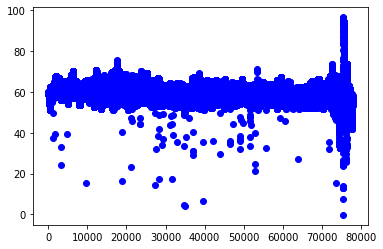

In [31]:
plt.plot(df['FCCGLI510.PV'],'bo')

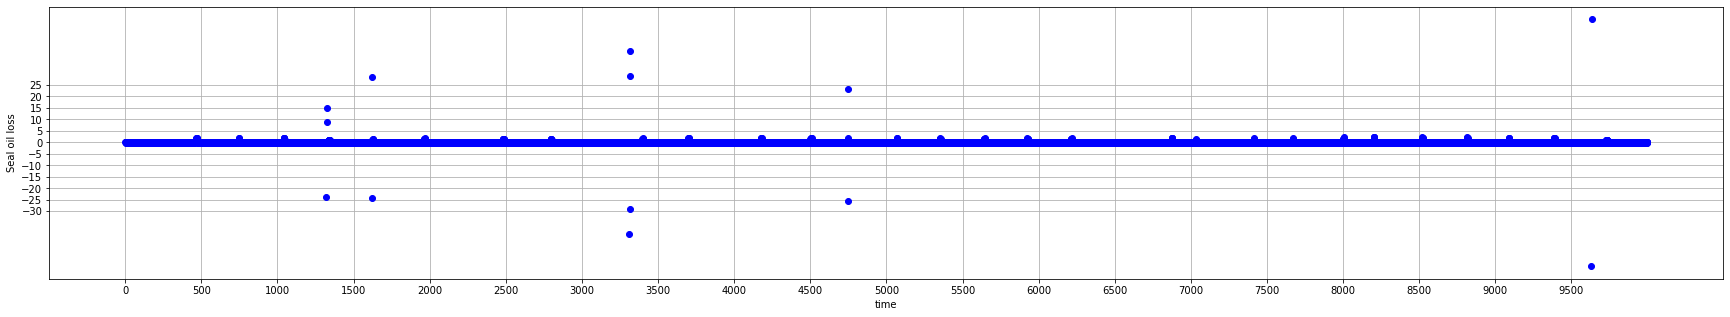

In [1252]:
#df['FCCGLI510.PV'].dropna()
#df['FCCGLI510.PV'].dropna().diff().drop(0)/5*60*24
#df['FCCGLI510.PV'].interpolate()
Y=df['FCCGLI510.PV'].diff()/5*60*24*52.5/210/60   #/2
#t1 = np.arange(0, 10000, 500)
t2 = Y.dropna()
#%matplotlib inline 
plt.plot(t2,'bo')
#plt.axis([0, 10000,-30, 30])
plt.grid(True)
plt.ylabel('Seal oil loss')
plt.xlabel('time')
plt.xticks(np.arange(0,10000, step=500))
plt.yticks(np.arange(-30, 30, step=5))
#plt.figure(figsize=(800,300))
plt.rcParams['figure.figsize']=(30,5)
plt.show()

## Ploting Correlation

In [1253]:
# 'FCCGLI510.PV' index "?" to be taken as Y parameter and correlation to be found 
# Drop the non correlating colum 

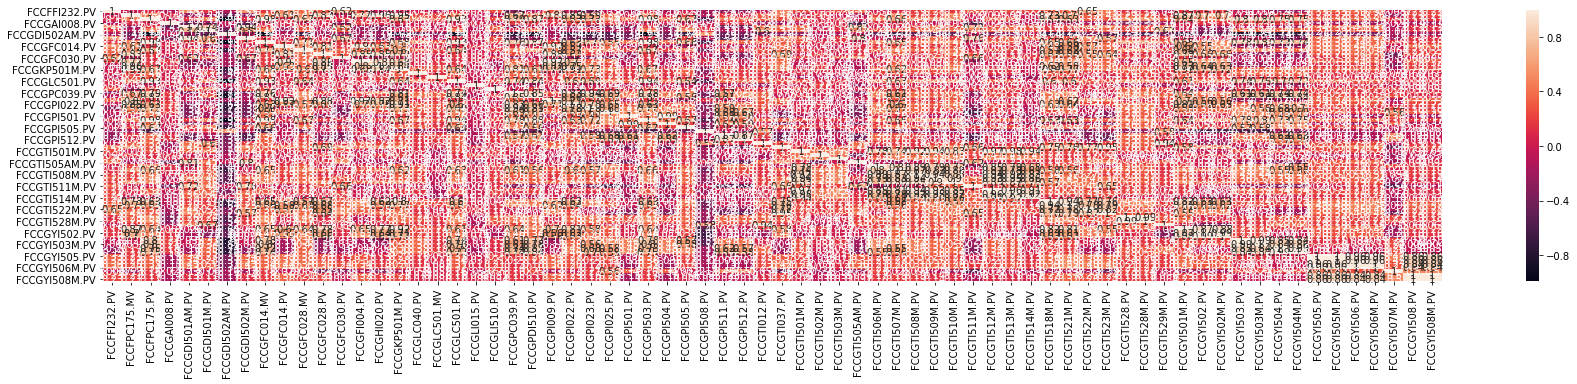

In [1254]:
import seaborn as sn
import matplotlib.pyplot as plt
Corr_matrix=df.corr(method= 'pearson', min_periods=10)
# sn.heatmap(df.corr(method= 'kendall', min_periods=10), annot=True) #(method='spearman')
# plt.show()
sn.heatmap(Corr_matrix, annot=True)
plt.show()

#### Correlation of one column with others

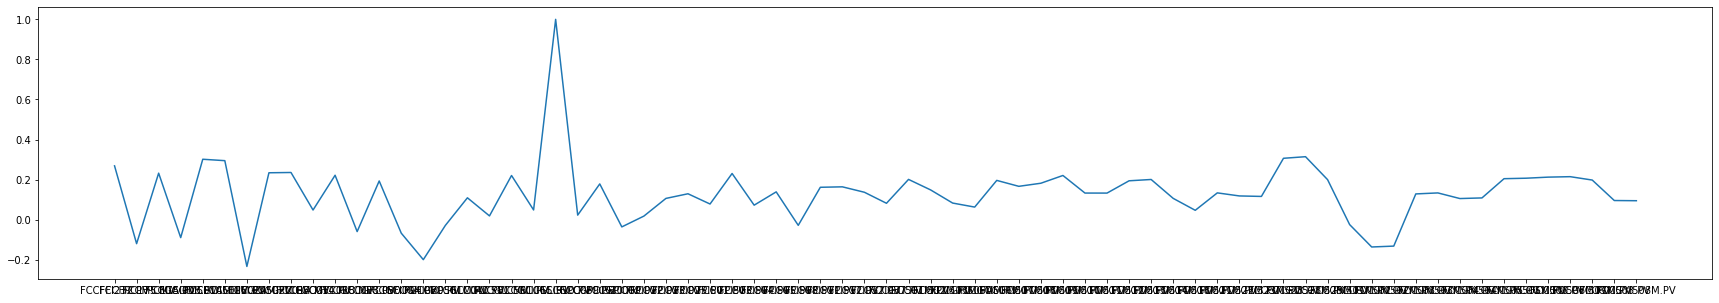

In [1255]:
# df.count() #counts np.nan column wise
# df.count(axis='columns') #counts np.nan Row wise
# df.cov() #Gives covariance but not neccessary
Corr=df.corrwith(df['FCCGLI510.PV'])
Corr
plt.plot(Corr)

In [1256]:
df['FCCGLI510.PV'].count()

9988

In [1257]:
Corr.to_csv (r'C:\Users\kpradeep\Desktop\Raghav Project\KP_Corr_R0.csv', index = True, header=True)

### Convert the Y Variable showing only Loss and not the Top-up 

In [1258]:
# df.insert()
# df.replace()
#df['FCCGLI510.PV'].replace(to_replace=df['FCCGLI510.PV']>0, value=np.NaN, )
Y=df['FCCGLI510.PV'].diff()/5*60*24*52.5/210/60  #/2
# Y=Y.replace(to_replace=Y>0,value= 111)
# Y=Y.replace(to_replace=111,value= np.nan)
# plt.plot(Y)
#Y.iloc[3]*-1
# i=0
# count=0
for i in range (9988):
    if Y.iloc[i]>0:
        print(i,Y.iloc[i])
        count+=1
        Y.iloc[i]=Y.iloc[i]* -1
        print(i,"th item converted to negative")
print(count, "are the total records converted")    


13 0.12000000000000169
13 th item converted to negative
18 0.12000000000000169
18 th item converted to negative
23 0.12000000000000169
23 th item converted to negative
35 0.12000000000000169
35 th item converted to negative
45 0.12000000000000169
45 th item converted to negative
55 0.11999999999999318
55 th item converted to negative
70 0.12000000000000169
70 th item converted to negative
114 0.12000000000000169
114 th item converted to negative
121 0.12000000000000169
121 th item converted to negative
130 0.12000000000000169
130 th item converted to negative
158 0.11999999999999318
158 th item converted to negative
160 0.11999999999999318
160 th item converted to negative
177 0.12000000000000169
177 th item converted to negative
274 0.12000000000000169
274 th item converted to negative
327 0.12000000000000169
327 th item converted to negative
357 0.12000000000000169
357 th item converted to negative
416 0.12000000000000169
416 th item converted to negative
445 0.11999999999999318
445 

2978 th item converted to negative
3003 0.11999999999999318
3003 th item converted to negative
3021 0.12000000000000169
3021 th item converted to negative
3050 0.12000000000000169
3050 th item converted to negative
3064 0.12000000000000169
3064 th item converted to negative
3068 0.12000000000000169
3068 th item converted to negative
3078 0.12000000000000169
3078 th item converted to negative
3089 0.12000000000000169
3089 th item converted to negative
3099 0.12000000000000169
3099 th item converted to negative
3110 0.12000000000000169
3110 th item converted to negative
3118 0.12000000000000169
3118 th item converted to negative
3124 0.12000000000000169
3124 th item converted to negative
3130 0.12000000000000169
3130 th item converted to negative
3146 0.12000000000000169
3146 th item converted to negative
3150 0.12000000000000169
3150 th item converted to negative
3173 0.12000000000000169
3173 th item converted to negative
3193 0.12000000000000169
3193 th item converted to negative
3196 

5076 0.11999999999999318
5076 th item converted to negative
5089 0.12000000000000169
5089 th item converted to negative
5093 0.12000000000000169
5093 th item converted to negative
5102 0.11999999999999318
5102 th item converted to negative
5160 0.12000000000000169
5160 th item converted to negative
5178 0.12000000000000169
5178 th item converted to negative
5187 0.12000000000000169
5187 th item converted to negative
5191 0.12000000000000169
5191 th item converted to negative
5194 0.12000000000000169
5194 th item converted to negative
5201 0.12000000000000169
5201 th item converted to negative
5208 0.11999999999999318
5208 th item converted to negative
5210 0.12000000000000169
5210 th item converted to negative
5222 0.12000000000000169
5222 th item converted to negative
5225 0.12000000000000169
5225 th item converted to negative
5230 0.11999999999999318
5230 th item converted to negative
5236 0.12000000000000169
5236 th item converted to negative
5247 0.12000000000000169
5247 th item co

7339 0.11999999999999318
7339 th item converted to negative
7349 0.12000000000000169
7349 th item converted to negative
7365 0.11999999999999318
7365 th item converted to negative
7367 0.12000000000000169
7367 th item converted to negative
7373 0.12000000000000169
7373 th item converted to negative
7409 0.12000000000000169
7409 th item converted to negative
7410 1.4400000000000035
7410 th item converted to negative
7411 1.8
7411 th item converted to negative
7412 1.0799999999999983
7412 th item converted to negative
7434 0.12000000000000169
7434 th item converted to negative
7436 0.12000000000000169
7436 th item converted to negative
7444 0.12000000000000169
7444 th item converted to negative
7454 0.12000000000000169
7454 th item converted to negative
7456 0.12000000000000169
7456 th item converted to negative
7503 0.11999999999999318
7503 th item converted to negative
7513 0.12000000000000169
7513 th item converted to negative
7525 0.24000000000000338
7525 th item converted to negativ

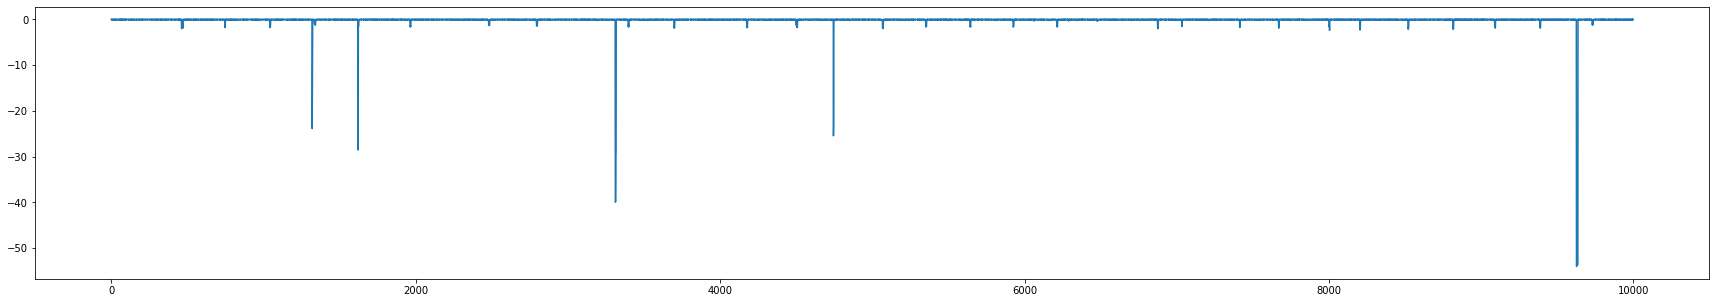

In [1259]:
plt.plot(Y)

In [1260]:
df['FCCGLI510.PV'].count(), Y.count()

(9988, 9987)

###### converting the first item np.nan to zero 

In [1261]:
# Y.shape, df['FCCGLI510.PV'].shape,Y.isna()
# Y=Y.replace(to_replace=np.nan,value=0)
Y.count()

9987

In [1262]:
df.shape

(9988, 71)

### Since we have Y Parameter lets drop 'FCCGLI510.PV' and add Y as Target

#### Delete the Level variable

In [1263]:
del df['FCCGLI510.PV']
#df=df.drop('FCCGLI510.PV',axis=1,inplace=True)
#df=df.replace(to_replace='FCCGLI510.PV',value=Y)
#df=df.insert(column ='Target', value=Y)
df.shape

(9988, 70)

In [1264]:
df.columns

Index(['DATE', 'FCCFFI232.PV', 'FCCFPC175.MV', 'FCCFPC175.PV', 'FCCGAI008.PV',
       'FCCGDI501AM.PV', 'FCCGDI501M.PV', 'FCCGDI502AM.PV', 'FCCGDI502M.PV',
       'FCCGFC014.MV', 'FCCGFC014.PV', 'FCCGFC028.MV', 'FCCGFC028.PV',
       'FCCGFC030.PV', 'FCCGFI004.PV', 'FCCGHI020.PV', 'FCCGKP501M.PV',
       'FCCGLC040.PV', 'FCCGLC501.MV', 'FCCGLC501.PV', 'FCCGLI015.PV',
       'FCCGPC039.PV', 'FCCGPDI510.PV', 'FCCGPI009.PV', 'FCCGPI022.PV',
       'FCCGPI023.PV', 'FCCGPI025.PV', 'FCCGPI501.PV', 'FCCGPI503.PV',
       'FCCGPI504.PV', 'FCCGPI505.PV', 'FCCGPI508.PV', 'FCCGPI511.PV',
       'FCCGPI512.PV', 'FCCGTI012.PV', 'FCCGTI037.PV', 'FCCGTI501M.PV',
       'FCCGTI502M.PV', 'FCCGTI503M.PV', 'FCCGTI505AM.PV', 'FCCGTI506M.PV',
       'FCCGTI507M.PV', 'FCCGTI508M.PV', 'FCCGTI509M.PV', 'FCCGTI510M.PV',
       'FCCGTI511M.PV', 'FCCGTI512M.PV', 'FCCGTI513M.PV', 'FCCGTI514M.PV',
       'FCCGTI518M.PV', 'FCCGTI521M.PV', 'FCCGTI522M.PV', 'FCCGTI523M.PV',
       'FCCGTI528.PV', 'FCCGTI528M.PV', 'FC

In [1265]:
df.dtypes

DATE               object
FCCFFI232.PV      float64
FCCFPC175.MV      float64
FCCFPC175.PV      float64
FCCGAI008.PV      float64
FCCGDI501AM.PV    float64
FCCGDI501M.PV     float64
FCCGDI502AM.PV    float64
FCCGDI502M.PV     float64
FCCGFC014.MV      float64
FCCGFC014.PV      float64
FCCGFC028.MV      float64
FCCGFC028.PV      float64
FCCGFC030.PV      float64
FCCGFI004.PV      float64
FCCGHI020.PV      float64
FCCGKP501M.PV     float64
FCCGLC040.PV      float64
FCCGLC501.MV      float64
FCCGLC501.PV      float64
FCCGLI015.PV      float64
FCCGPC039.PV      float64
FCCGPDI510.PV     float64
FCCGPI009.PV      float64
FCCGPI022.PV      float64
FCCGPI023.PV      float64
FCCGPI025.PV      float64
FCCGPI501.PV      float64
FCCGPI503.PV      float64
FCCGPI504.PV      float64
                   ...   
FCCGTI506M.PV     float64
FCCGTI507M.PV     float64
FCCGTI508M.PV     float64
FCCGTI509M.PV     float64
FCCGTI510M.PV     float64
FCCGTI511M.PV     float64
FCCGTI512M.PV     float64
FCCGTI513M.P

#### Insert the Y targer variable

In [1266]:
#df=df.insert(70,'Target',Y) # not working 'NoneType' object has no attribute 'insert'
#df['Target']=Y
dt=df
dt.head()

,DATE,FCCFFI232.PV,FCCFPC175.MV,FCCFPC175.PV,FCCGAI008.PV,FCCGDI501AM.PV,FCCGDI501M.PV,FCCGDI502AM.PV,FCCGDI502M.PV,FCCGFC014.MV,...,FCCGYI503M.PV,FCCGYI504.PV,FCCGYI504M.PV,FCCGYI505.PV,FCCGYI505M.PV,FCCGYI506.PV,FCCGYI506M.PV,FCCGYI507M.PV,FCCGYI508.PV,FCCGYI508M.PV
0,9/1/2019 0:00,2337.908,82.5,1.55,1.2,0.098345,0.134822,-0.000607,0.050613,100.0,...,32.7985,41.5,41.4200,22.5,22.3476,23.24,23.0831,13.9703,11.9376,11.8419
1,9/1/2019 0:05,2344.052,82.4,1.55,1.2,0.098262,0.134689,-0.000607,0.050646,100.0,...,32.8118,41.6,41.4730,22.5,22.4016,23.31,23.1438,14.0915,12.0204,11.9208
2,9/1/2019 0:10,2347.076,82.7,1.55,1.2,0.098513,0.134888,-0.000607,0.050456,100.0,...,32.7809,41.6,41.4656,22.6,22.4671,23.35,23.2005,14.1215,12.1214,12.0330
3,9/1/2019 0:15,2357.487,82.9,1.55,1.2,0.098849,0.135151,-0.000607,0.050602,100.0,...,32.7724,41.5,41.4687,22.7,22.5229,23.44,23.2880,14.0808,12.1915,12.1120
4,9/1/2019 0:20,2358.864,83.1,1.55,1.2,0.098725,0.134935,-0.000607,0.050314,100.0,...,32.6392,41.5,41.3928,22.7,22.5185,23.45,23.3149,14.0669,12.1962,12.1122


In [1267]:
dt.shape

(9988, 70)

In [1268]:
dt['Target']=Y

In [1269]:
dt.shape

(9988, 71)

In [1270]:
dt.columns

Index(['DATE', 'FCCFFI232.PV', 'FCCFPC175.MV', 'FCCFPC175.PV', 'FCCGAI008.PV',
       'FCCGDI501AM.PV', 'FCCGDI501M.PV', 'FCCGDI502AM.PV', 'FCCGDI502M.PV',
       'FCCGFC014.MV', 'FCCGFC014.PV', 'FCCGFC028.MV', 'FCCGFC028.PV',
       'FCCGFC030.PV', 'FCCGFI004.PV', 'FCCGHI020.PV', 'FCCGKP501M.PV',
       'FCCGLC040.PV', 'FCCGLC501.MV', 'FCCGLC501.PV', 'FCCGLI015.PV',
       'FCCGPC039.PV', 'FCCGPDI510.PV', 'FCCGPI009.PV', 'FCCGPI022.PV',
       'FCCGPI023.PV', 'FCCGPI025.PV', 'FCCGPI501.PV', 'FCCGPI503.PV',
       'FCCGPI504.PV', 'FCCGPI505.PV', 'FCCGPI508.PV', 'FCCGPI511.PV',
       'FCCGPI512.PV', 'FCCGTI012.PV', 'FCCGTI037.PV', 'FCCGTI501M.PV',
       'FCCGTI502M.PV', 'FCCGTI503M.PV', 'FCCGTI505AM.PV', 'FCCGTI506M.PV',
       'FCCGTI507M.PV', 'FCCGTI508M.PV', 'FCCGTI509M.PV', 'FCCGTI510M.PV',
       'FCCGTI511M.PV', 'FCCGTI512M.PV', 'FCCGTI513M.PV', 'FCCGTI514M.PV',
       'FCCGTI518M.PV', 'FCCGTI521M.PV', 'FCCGTI522M.PV', 'FCCGTI523M.PV',
       'FCCGTI528.PV', 'FCCGTI528M.PV', 'FC

# Export of Dataset with Target Variable to use for Raw training

In [1271]:
dt.to_csv (r'C:\Users\kpradeep\Desktop\Raghav Project\KP_Pre_R2.csv', index = False, header=True)

### Check Correlation of Target Variable with Other Variables

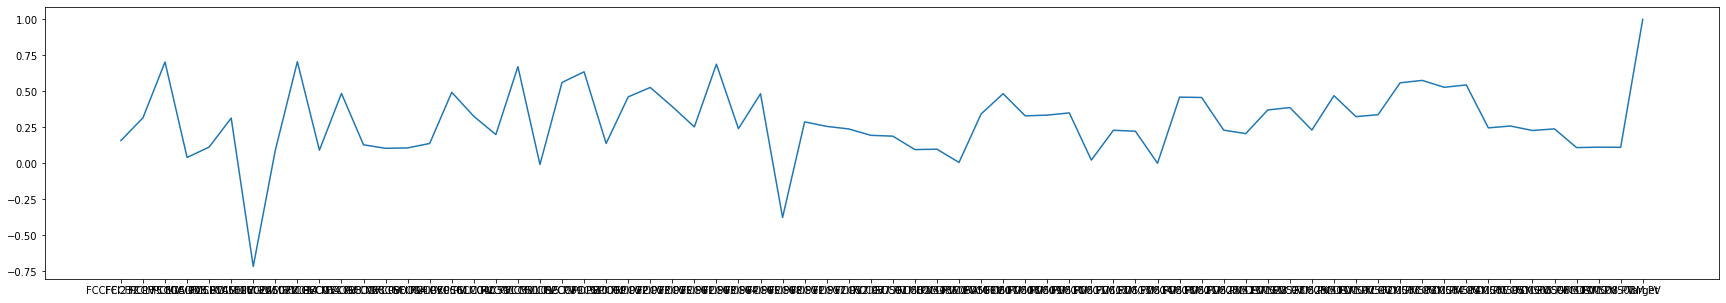

In [1272]:
Corr1=dt.corrwith(dt['Target'])
plt.plot(Corr1)

In [1273]:
Corr1.shape

(70,)

#### Number of variable correlation with p>0.6

In [1274]:
i=0
count=0
for i in range (69): #though 70 are there taking 69 to avoid Target self correlation
    if Corr1[i]>0.6 or Corr1[i]<-0.6:
        print(Corr1.index[i],Corr1[i])
        count+=1
print("A total of",count, "Variables are strongly correlated as per pearson method of correlation")

FCCFPC175.PV 0.7037546904013836
FCCGDI502AM.PV -0.7161266310827498
FCCGFC014.MV 0.7057906700963777
FCCGLC501.PV 0.6712261747716582
FCCGPDI510.PV 0.635724858880643
FCCGPI503.PV 0.6886869986194989
A total of 6 Variables are strongly correlated as per pearson method of correlation


#### Number of variable correlation with p>0.5

In [1275]:
i=0
count=0
for i in range (69): #though 70 are there taking 69 to avoid Target self correlation
    if Corr1[i]>0.5 or Corr1[i]<-0.5:
        print(Corr1.index[i],Corr1[i])
        count+=1
print("A total of",count, "Variables are strongly correlated as per pearson method of correlation")

FCCFPC175.PV 0.7037546904013836
FCCGDI502AM.PV -0.7161266310827498
FCCGFC014.MV 0.7057906700963777
FCCGLC501.PV 0.6712261747716582
FCCGPC039.PV 0.5618024823275106
FCCGPDI510.PV 0.635724858880643
FCCGPI023.PV 0.5269377088506981
FCCGPI503.PV 0.6886869986194989
FCCGYI503.PV 0.5592637025168977
FCCGYI503M.PV 0.5760777069945566
FCCGYI504.PV 0.5281578713827745
FCCGYI504M.PV 0.5446494079248153
A total of 12 Variables are strongly correlated as per pearson method of correlation


#### Number of variable correlation with p>0.4

In [1276]:
i=0
count=0
for i in range (69): #though 70 are there taking 69 to avoid Target self correlation
    if Corr1[i]>0.4 or Corr1[i]<-0.4:
        print(Corr1.index[i])#,Corr1[i])
        count+=1
print("A total of",count, "Variables are strongly correlated as per pearson method of correlation")

FCCFPC175.PV
FCCGDI502AM.PV
FCCGFC014.MV
FCCGFC028.MV
FCCGKP501M.PV
FCCGLC501.PV
FCCGPC039.PV
FCCGPDI510.PV
FCCGPI022.PV
FCCGPI023.PV
FCCGPI503.PV
FCCGPI505.PV
FCCGTI507M.PV
FCCGTI518M.PV
FCCGTI521M.PV
FCCGYI501M.PV
FCCGYI503.PV
FCCGYI503M.PV
FCCGYI504.PV
FCCGYI504M.PV
A total of 20 Variables are strongly correlated as per pearson method of correlation


#### Number of variable correlation with p>0.3

In [1277]:
i=0
count=0
for i in range (69): #though 70 are there taking 69 to avoid Target self correlation
    if Corr1[i]>0.3 or Corr1[i]<-0.3:
        print(Corr1.index[i],Corr1[i])
        count+=1
print("A total of",count, "Variables are strongly correlated as per pearson method of correlation")

FCCFPC175.MV 0.3164057764705419
FCCFPC175.PV 0.7037546904013836
FCCGDI501M.PV 0.3141804672139329
FCCGDI502AM.PV -0.7161266310827498
FCCGFC014.MV 0.7057906700963777
FCCGFC028.MV 0.48539496755403905
FCCGKP501M.PV 0.49333121020042714
FCCGLC040.PV 0.32677679159971573
FCCGLC501.PV 0.6712261747716582
FCCGPC039.PV 0.5618024823275106
FCCGPDI510.PV 0.635724858880643
FCCGPI022.PV 0.4615915477243664
FCCGPI023.PV 0.5269377088506981
FCCGPI025.PV 0.3941379419007764
FCCGPI503.PV 0.6886869986194989
FCCGPI505.PV 0.4834504979421844
FCCGPI508.PV -0.3760039639003739
FCCGTI506M.PV 0.34248620085697873
FCCGTI507M.PV 0.4836727875678166
FCCGTI508M.PV 0.329878208786131
FCCGTI509M.PV 0.33483222001190527
FCCGTI510M.PV 0.3503284045288589
FCCGTI518M.PV 0.4598991467951868
FCCGTI521M.PV 0.4573961695047117
FCCGTI528.PV 0.3708159114099353
FCCGTI528M.PV 0.38729905068948695
FCCGYI501M.PV 0.4696807162130372
FCCGYI502.PV 0.32428647402715954
FCCGYI502M.PV 0.3380232596393852
FCCGYI503.PV 0.5592637025168977
FCCGYI503M.PV 0.57

### Export Correlation of Target variable to CSV R1 for Target variable

In [1278]:
Corr1.to_csv (r'C:\Users\kpradeep\Desktop\Raghav Project\KP_Corr_R1.csv', index = True, header=True)

### Drop Weekly correlated column to reduce variable in dataframe for training

##### This is our X independent variables as per P>0.4

In [1279]:
X=pd.DataFrame(dt,index=None, columns=['FCCFPC175.PV','FCCGDI502AM.PV','FCCGFC014.MV','FCCGFC028.MV','FCCGKP501M.PV','FCCGLC501.PV','FCCGPC039.PV','FCCGPDI510.PV','FCCGPI022.PV','FCCGPI023.PV','FCCGPI503.PV','FCCGPI505.PV','FCCGTI507M.PV','FCCGTI518M.PV','FCCGTI521M.PV','FCCGYI501M.PV','FCCGYI503.PV','FCCGYI503M.PV','FCCGYI504.PV','FCCGYI504M.PV'])



In [1280]:
X.shape

(9988, 20)

In [1281]:
X.to_csv (r'C:\Users\kpradeep\Desktop\Raghav Project\KP_X.csv', index = False, header=True)

##### This is our y dependant variable

In [1282]:
y=pd.DataFrame(dt,index=None, columns=['Target'])

In [1283]:
y.shape

(9988, 1)

In [1284]:
y.to_csv (r'C:\Users\kpradeep\Desktop\Raghav Project\KP_y.csv', index = False, header=True)

## NOW ITS TIME TO TRAIN AND TEST MODEL

In [1285]:
X=pd.read_csv ('KP_X.csv')
y=pd.read_csv ('KP_y.csv')

In [1286]:
y=y.replace(to_replace=np.nan,value=0)

In [1287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=85)

In [1288]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((7491, 20), (2497, 20), (7491, 1), (2497, 1))

## Linear Regression

In [1289]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
y_test.head(),y_pred[0:5]
lr.score(X_train,y_train),lr.score(X_test,y_pred)

(0.7612483640143088, 1.0)

#### Mean Squared Error

In [1290]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test,y_pred)
# y_true=y_test
# mean_squared_error(y_true,y_pred,multioutput='uniform_average')

1.8287405429887487

In [1291]:
mse = mean_absolute_error(y_train,lr.predict(X_train))
print("Training Set Mean Absolute Error : %.4f" %mse)

mse = mean_absolute_error(y_test,lr.predict(X_test))
print("Test Set Mean Absolute Error : %.4f" %mse)

Training Set Mean Absolute Error : 0.1011
Test Set Mean Absolute Error : 0.1375


##### Coeffecient of the linear regression

In [1292]:
for idx, col_name in enumerate(X_train.columns):
    print("The coeffecient for {} is {}". format(col_name,lr.coef_[0][idx]))

The coeffecient for FCCFPC175.PV is -8.804884055619034
The coeffecient for FCCGDI502AM.PV is -206813.73000913343
The coeffecient for FCCGFC014.MV is -0.24118506528066064
The coeffecient for FCCGFC028.MV is 0.011930784662354199
The coeffecient for FCCGKP501M.PV is 0.00027323883841745555
The coeffecient for FCCGLC501.PV is 0.008187423625599877
The coeffecient for FCCGPC039.PV is -0.5057629501785215
The coeffecient for FCCGPDI510.PV is 0.0005786030815215781
The coeffecient for FCCGPI022.PV is -0.08169880037023347
The coeffecient for FCCGPI023.PV is 0.06653218327660682
The coeffecient for FCCGPI503.PV is -9.672127290555558
The coeffecient for FCCGPI505.PV is -0.03249868583810667
The coeffecient for FCCGTI507M.PV is 0.013470309851300044
The coeffecient for FCCGTI518M.PV is -0.0021785641883980134
The coeffecient for FCCGTI521M.PV is 0.0002626077991862985
The coeffecient for FCCGYI501M.PV is -0.035715783182524774
The coeffecient for FCCGYI503.PV is 0.15561793653773748
The coeffecient for FCCG

##### Intercept of the linear regression

In [1293]:
col_name in enumerate(y_train.columns)
print("The Intercept for {} is {}". format(col_name,lr.intercept_[0]))

The Intercept for FCCGYI504M.PV is -70.11154134219592


#### Plot the Graph for Linear Regression

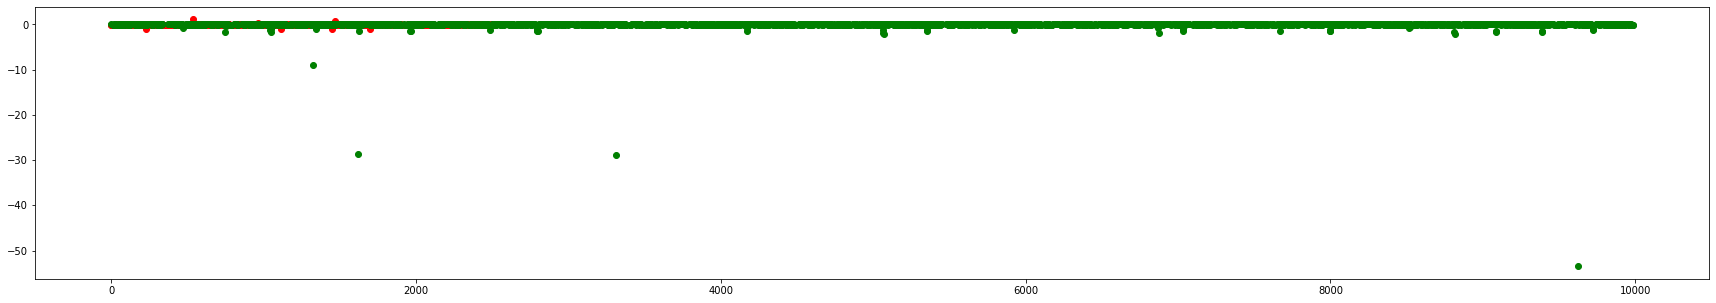

In [1294]:
plt.plot(y_pred, 'ro')
plt.plot(y_test, 'go')
#plt.legend()
plt.show()

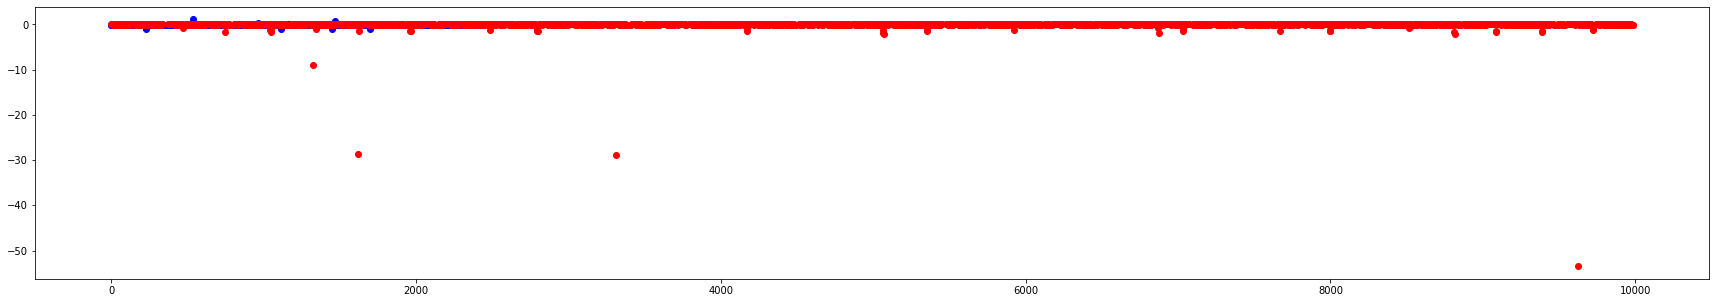

In [1295]:
plt.plot(y_pred, 'bo')
plt.plot(y_test, 'ro')
#plt.legend()
plt.show()

## Decission Tree

In [1296]:
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor(min_samples_split= 5, max_depth = 10, random_state =100)  
regressor.fit(X_train, y_train)
regressor.score(X_train, y_train)

0.8807649890898616

In [1297]:
y_pred=regressor.predict(X_test)
print('Variance Score Test:', regressor.score(X_test,y_pred))

Variance Score Test: 1.0


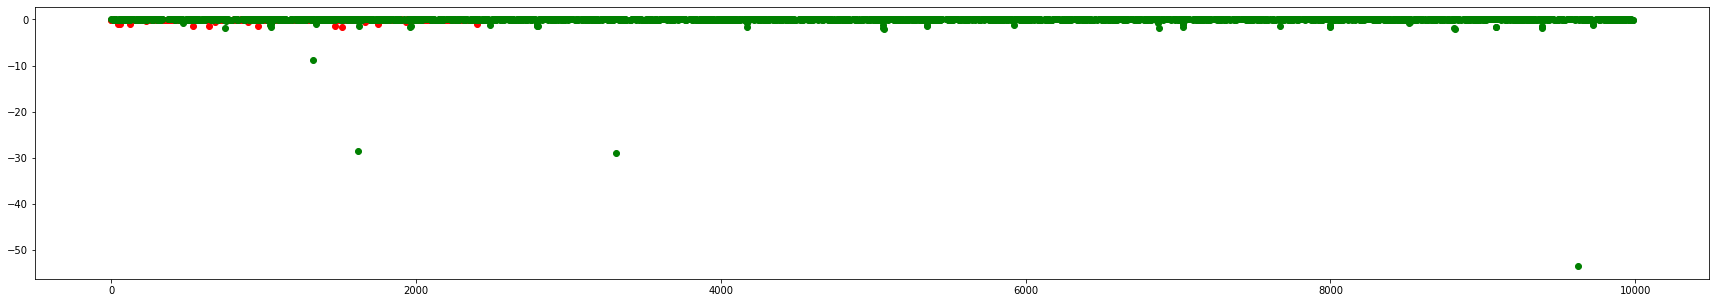

In [1298]:
plt.plot(y_pred, 'ro')
plt.plot(y_test, 'go')
#plt.legend()
plt.show()


## Generalized Linear Models, and Poisson loss for gradient boosting

In [1299]:
#from sklearn.linear_model import PoissonRegressor
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
#glm = PoissonRegressor()
gbdt = HistGradientBoostingRegressor(loss='least_squares', learning_rate=.5)
#regressor.fit(X_train, y_train)
gbdt.fit(X_train, y_train)
print(gbdt.score(X_train, y_train))
y_pred=gbdt.predict(X_test)
print(gbdt.score(X_test,y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8804783884216703
1.0


### Export the Models

In [1300]:
from sklearn.externals import joblib
joblib.dump(lr,'KP_lr_Mdl.pkl')
joblib.dump(regressor,'KP_regressor_Mdl.pkl')
joblib.dump(gbdt,'KP_gbdt_Mdl.pkl')

['KP_gbdt_Mdl.pkl']

### Take in Fresh Data to Check the Model, prepare the Data to have no np.nan

In [1301]:
# Read the Actual dataset using Pandas to check the Models
df_Act = pd.read_csv("WGC_Act.csv")

In [1302]:
df_Act.count()

DATE               3000
FCCFFI232.PV       3000
FCCFPC175.MV       3000
FCCFPC175.PV       3000
FCCGAI008.PV       3000
FCCGDI501AM.PV     3000
FCCGDI501M.PV      3000
FCCGDI502AM.PV     3000
FCCGDI502M.PV      3000
FCCGFC014.MV       3000
FCCGFC014.PV       3000
FCCGFC028.MV       3000
FCCGFC028.PV       3000
FCCGFC030.PV       3000
FCCGFI004.PV       3000
FCCGHI020.PV       3000
FCCGKP501M.PV      3000
FCCGLC040.PV       3000
FCCGLC501.MV       3000
FCCGLC501.PV       3000
FCCGLI015.PV       3000
FCCGLI510.PV       3000
FCCGPC039.PV       3000
FCCGPDI510.PV      3000
FCCGPI009.PV       3000
FCCGPI022.PV       3000
FCCGPI023.PV       3000
FCCGPI025.PV       3000
FCCGPI501.PV       3000
FCCGPI503.PV       3000
                   ... 
FCCGTI508M.PV      3000
FCCGTI509M.PV      3000
FCCGTI510M.PV      3000
FCCGTI511M.PV      3000
FCCGTI512M.PV      3000
FCCGTI513M.PV      3000
FCCGTI514M.PV      3000
FCCGTI518M.PV      3000
FCCGTI521M.PV      3000
FCCGTI522M.PV      3000
FCCGTI523M.PV   

In [1303]:
X=pd.DataFrame(df_Act,index=None, columns=['FCCFPC175.PV','FCCGDI502AM.PV','FCCGFC014.MV','FCCGFC028.MV','FCCGKP501M.PV','FCCGLC501.PV','FCCGPC039.PV','FCCGPDI510.PV','FCCGPI022.PV','FCCGPI023.PV','FCCGPI503.PV','FCCGPI505.PV','FCCGTI507M.PV','FCCGTI518M.PV','FCCGTI521M.PV','FCCGYI501M.PV','FCCGYI503.PV','FCCGYI503M.PV','FCCGYI504.PV','FCCGYI504M.PV'])



In [1304]:
X.shape

(3000, 20)

#### check for np.nan

In [1305]:
i=0
j=0
count=0
bool_Act = X.isna() # or use df.isnull()
bool_Act
for i in range(3000):
    for j in range(20):
        if(bool_Act.iloc[i,j]==True):
            count+=1
print("there are a total of",count,"np.nans to take care of")

there are a total of 0 np.nans to take care of


## Load Model to run with X

In [1306]:
# joblib.dump(lr,'KP_lr_Mdl.pkl')
# joblib.dump(regressor,'KP_regressor_Mdl.pkl')
# joblib.dump(gbdt,'KP_gbdt_Mdl.pkl')

m1 = joblib.load('KP_lr_Mdl.pkl')
m2 = joblib.load('KP_regressor_Mdl.pkl')
m3 = joblib.load('KP_gbdt_Mdl.pkl')
# m4 = joblib.load('KP_classifier_Mdl.pkl')

ol_m1 = m1.predict(X)
ol_m2 = m2.predict(X)
ol_m3 = m3.predict(X)
# ol_m4 = m4.predict(X)

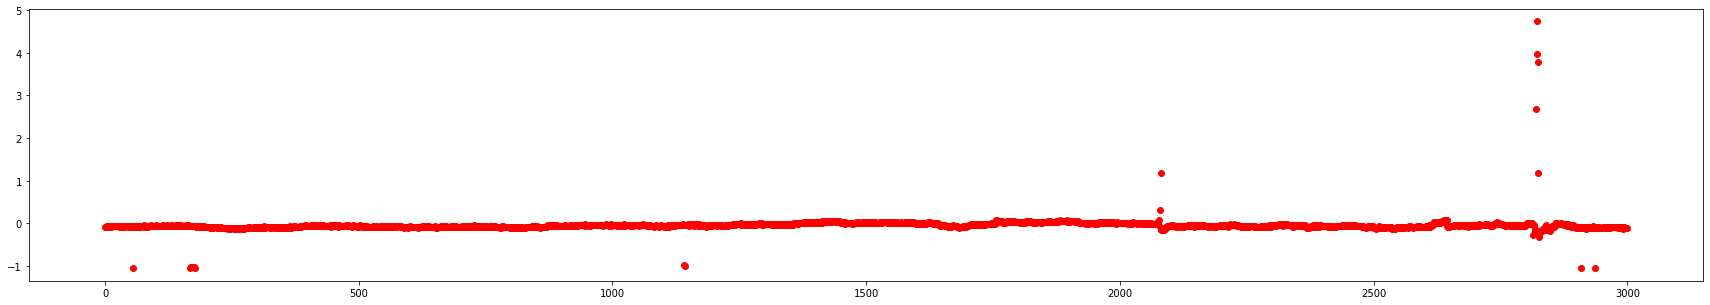

In [1307]:
plt.plot(ol_m1,"ro")

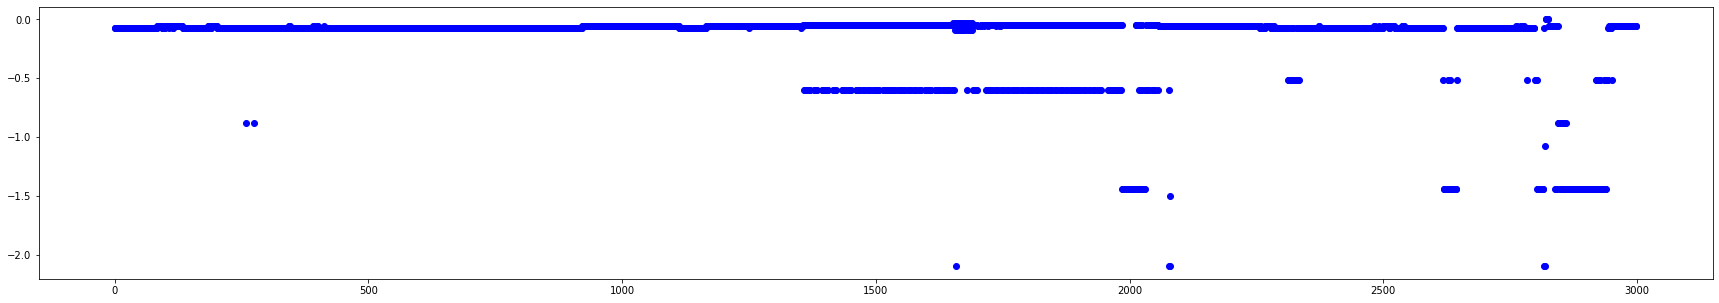

In [1308]:
plt.plot(ol_m2,"bo")

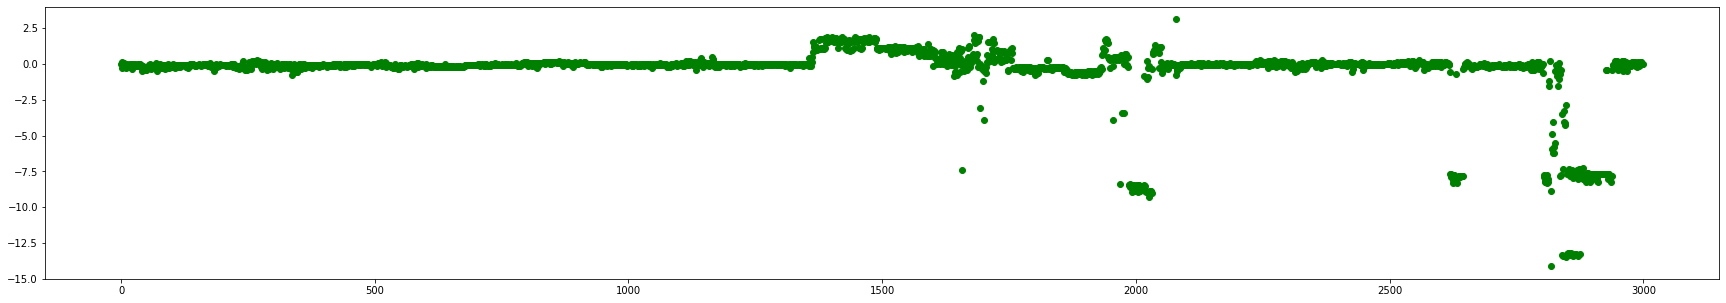

In [1309]:
plt.plot(ol_m3,"go")

In [1310]:
# plt.plot(ol_m4,"yo")

### Compare with actual physical readings

In [1311]:
y=pd.DataFrame(df_Act,index=None, columns=['FCCGLI510.PV'])

In [1312]:
Y=y['FCCGLI510.PV'].diff()/5*60*24*52.5/210/60 #/2
i=0
count=0
for i in range (9988):
    if Y.iloc[i]>0:
        print(i,Y.iloc[i])
        count+=1
        Y.iloc[i]=Y.iloc[i]* -1
        print(i,"th item converted to negative")
print(count, "are the total records converted")

15 0.6
15 th item converted to negative
16 1.2
16 th item converted to negative
17 1.3200000000000016
17 th item converted to negative
18 1.0799999999999983
18 th item converted to negative
19 1.0799999999999983
19 th item converted to negative
20 1.3200000000000016
20 th item converted to negative
21 1.2
21 th item converted to negative
22 1.0800000000000067
22 th item converted to negative
23 0.11999999999999318
23 th item converted to negative
40 0.12000000000001024
40 th item converted to negative
56 0.12000000000001024
56 th item converted to negative
58 0.12000000000001024
58 th item converted to negative
73 0.11999999999999318
73 th item converted to negative
100 0.12000000000001024
100 th item converted to negative
111 0.11999999999999318
111 th item converted to negative
137 0.12000000000000169
137 th item converted to negative
177 0.12000000000000169
177 th item converted to negative
186 0.12000000000000169
186 th item converted to negative
199 0.11999999999999318
199 th item

IndexError: single positional indexer is out-of-bounds

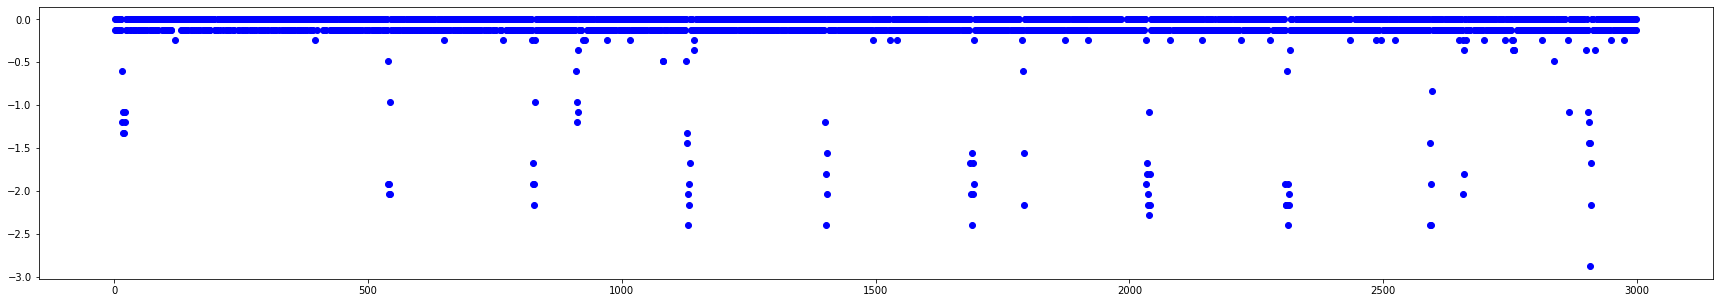

In [1313]:
plt.plot(Y,"bo")

### From the above Models Decision Tree is found more precise

In [1314]:
# Create a numpy array based on the model's feature importances
importance = regressor.feature_importances_

# Sort the feature labels based on the feature importance rankings from the model
feauture_indexes_by_importance = importance.argsort()

# Print each feature label, from most important to least important (reverse order)
for index in feauture_indexes_by_importance:
    print("{} - {:.2f}%".format(X.columns[index], (importance[index] * 100.0)))

FCCFPC175.PV - 0.00%
FCCGPI022.PV - 0.00%
FCCGYI504.PV - 0.00%
FCCGPI503.PV - 0.00%
FCCGTI507M.PV - 0.00%
FCCGYI503.PV - 0.00%
FCCGLC501.PV - 0.01%
FCCGFC014.MV - 0.02%
FCCGTI521M.PV - 0.03%
FCCGPDI510.PV - 0.04%
FCCGPC039.PV - 0.04%
FCCGTI518M.PV - 0.05%
FCCGPI023.PV - 0.06%
FCCGFC028.MV - 0.06%
FCCGYI501M.PV - 0.08%
FCCGYI504M.PV - 0.18%
FCCGYI503M.PV - 0.68%
FCCGKP501M.PV - 9.23%
FCCGPI505.PV - 9.67%
FCCGDI502AM.PV - 79.85%


##### FCCGLC501.PV	WGC SEAL OIL LEVEL
##### FCCGFC014.MV	WGC 1STG FLOW
##### FCCGTI521M.PV	SECOND STAGE DISCHARGE TEMP
##### FCCGPDI510.PV	DIFFERENCE PRESSURE
##### FCCGPC039.PV	INTER STG PRESSURE
##### FCCGTI518M.PV	FIRST STAGE DISCHARGE TEMP
##### FCCGPI023.PV	SECOND STAGE SUCTION PRESSURE
##### FCCGFC028.MV	WGC 2STG FLOW
##### FCCGKP501M.PV - 9.23%      WGC TURBINE SPEED
##### FCCGPI505.PV - 9.67%           STEAM INLET PRESSURE
##### FCCGDI502AM.PV - 79.85%    COMPRESSOR AXL DISP